### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'Saccharose hydrolysis with full mixture spectrum'

In [4]:
mixture_path = '../../data/saccharose_hydrolysis_full_mixture_spectrum/sucrose_better_baseline_constant_region_sizes_full_mixture_spectrum.csv'

reagents_names = ['saccharose', 'alpha-glucose','beta-glucose', 'fructose']

mixture_separator = '\t'

data_path = '../../data/saccharose_hydrolysis_full_mixture_spectrum/'

#### Mixture in time

In [5]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-1]

In [9]:
#np.all((mixture_time_data == mixture_time_data.dropna()).values)

In [10]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [11]:
mixture_time_data.columns = names

In [12]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


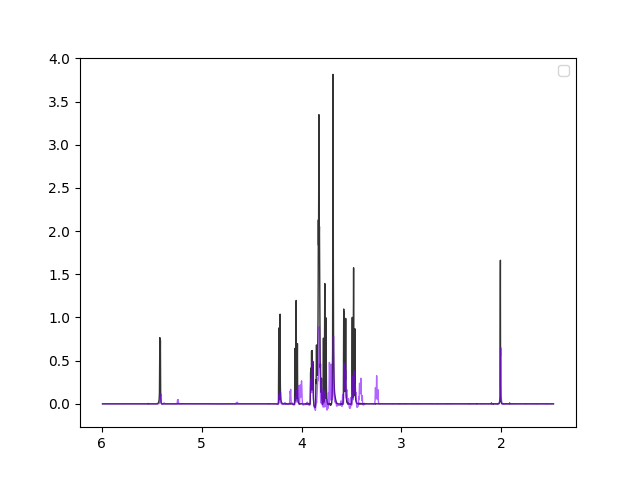

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [14]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

#### Reagents

In [12]:
# saccharose: (5.39173, 5.44305)
# alpha-glucose: (5.2178, 5.26134)
# beta-glucose: (4.62026, 4.67207)
# fructose: (3.97917, 4.01542)

In [15]:
mix1001 = pd.DataFrame(load_spectrum(mixture_time_data, 1001).confs)

reagent0 = mix1001[mix1001.iloc[:,0].apply(lambda x: (x>=5.39173 and x<=5.44305))]

reagent1 = mix1001[mix1001.iloc[:,0].apply(lambda x: (x>=5.2178 and x<=5.26134))]

reagent2 = mix1001[mix1001.iloc[:,0].apply(lambda x: (x>=4.62026 and x<=4.67207))]

reagent3 = mix1001[mix1001.iloc[:,0].apply(lambda x: (x>=3.97917 and x<=4.01542))]

reagents = [reagent0, reagent1, reagent2, reagent3]
reagents_sp = []

for reagent in reagents:
    ppm = reagent.iloc[:,0]
    ints = reagent.iloc[:,1]
    reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

for sp in reagents_sp:
    sp.trim_negative_intensities()
    sp.normalize()

<IPython.core.display.Javascript object>


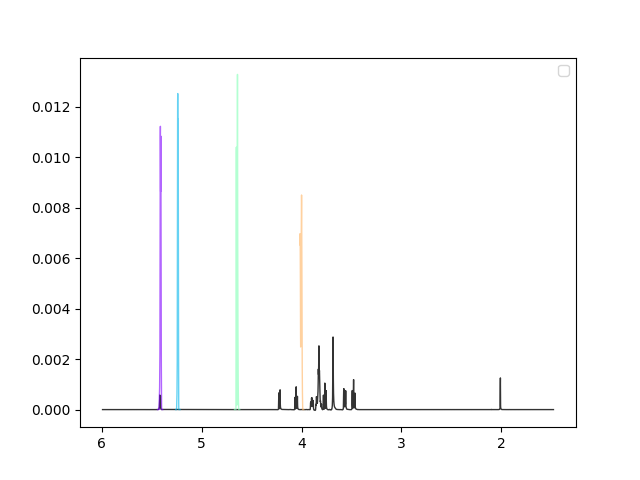

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [16]:
mix_to_plot = load_spectrum(mixture_time_data, 1)
mix_to_plot.normalize()

plt.gca().invert_xaxis()
NMRSpectrum.plot_all([mix_to_plot] + reagents_sp, profile=True)

### Mixture

In [17]:
#baseline correction
# for colname in ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]:
#     mixture_time_data[colname] = mixture_time_data[colname].apply(lambda x: x-0.0395)

<IPython.core.display.Javascript object>


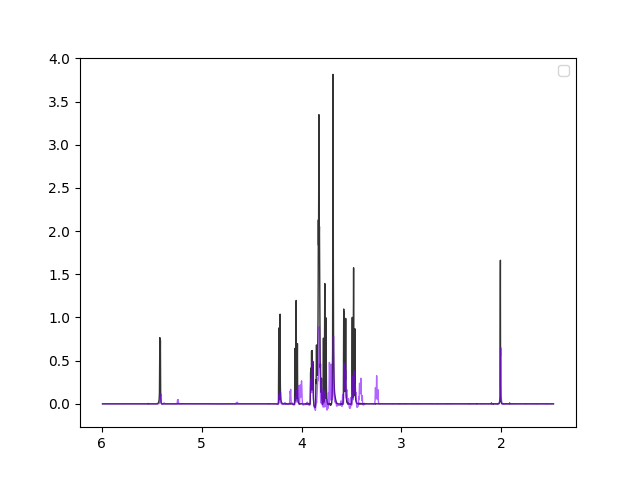

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [18]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

### Figures

<IPython.core.display.Javascript object>


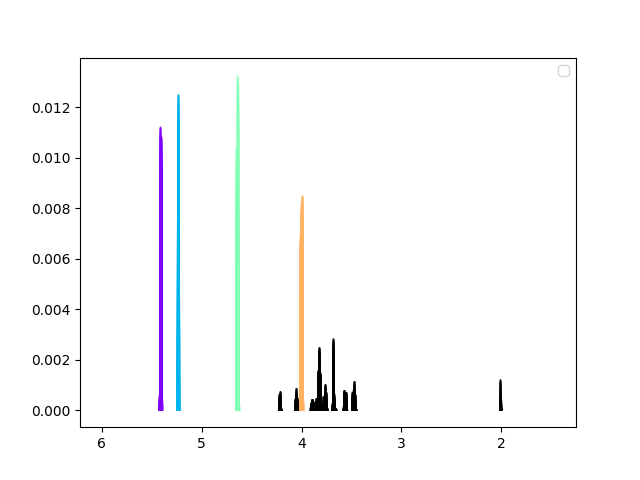

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [19]:
mix_to_plot = load_spectrum(mixture_time_data, 1)
mix_to_plot.trim_negative_intensities()
mix_to_plot.normalize()

plt.gca().invert_xaxis()
NMRSpectrum.plot_all([mix_to_plot] + reagents_sp, profile=False)

### Saving preprocessed spectra

In [20]:
np.savetxt(data_path + 'preprocessed_saccharose.csv', reagent0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_alpha_glucose.csv', reagent1, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_beta_glucose.csv', reagent2, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_fructose.csv', reagent3, delimiter = '\t')

In [21]:
np.savetxt(data_path + 'preprocessed_mixture.csv', mixture_time_data, delimiter = '\t')